# VQA for No-jump evolution

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## 1. Introduction to No-Jump Evolution

No-jump evolution is an effect that appears in open quantum system. In open quantum system, the quantum system is coupled to its environments, which can result in some dissipation and information leakage from the system to enviroment. Those operators acting on the quantum system and describing the dissipative part of the dynamics are called jump operators. For example, the annihilation operator $a$ is a jump operator for photon loss channel. The quantum jump is usually a stochastic process that take place at a certain rate. It is obvious that if a quantum jump takes place, the state of the system will change. However, even if the quantum jump does not occur, the state of the system may still change under certian conditions. This is called no-jump evolution. No-jump evolution can be thought as a consequence of quantum baysian update and it occurs in many quantum systems. In this tutorial, I will focus on the no-jump evolution that takes place in the superconducting dual-rail systems. 

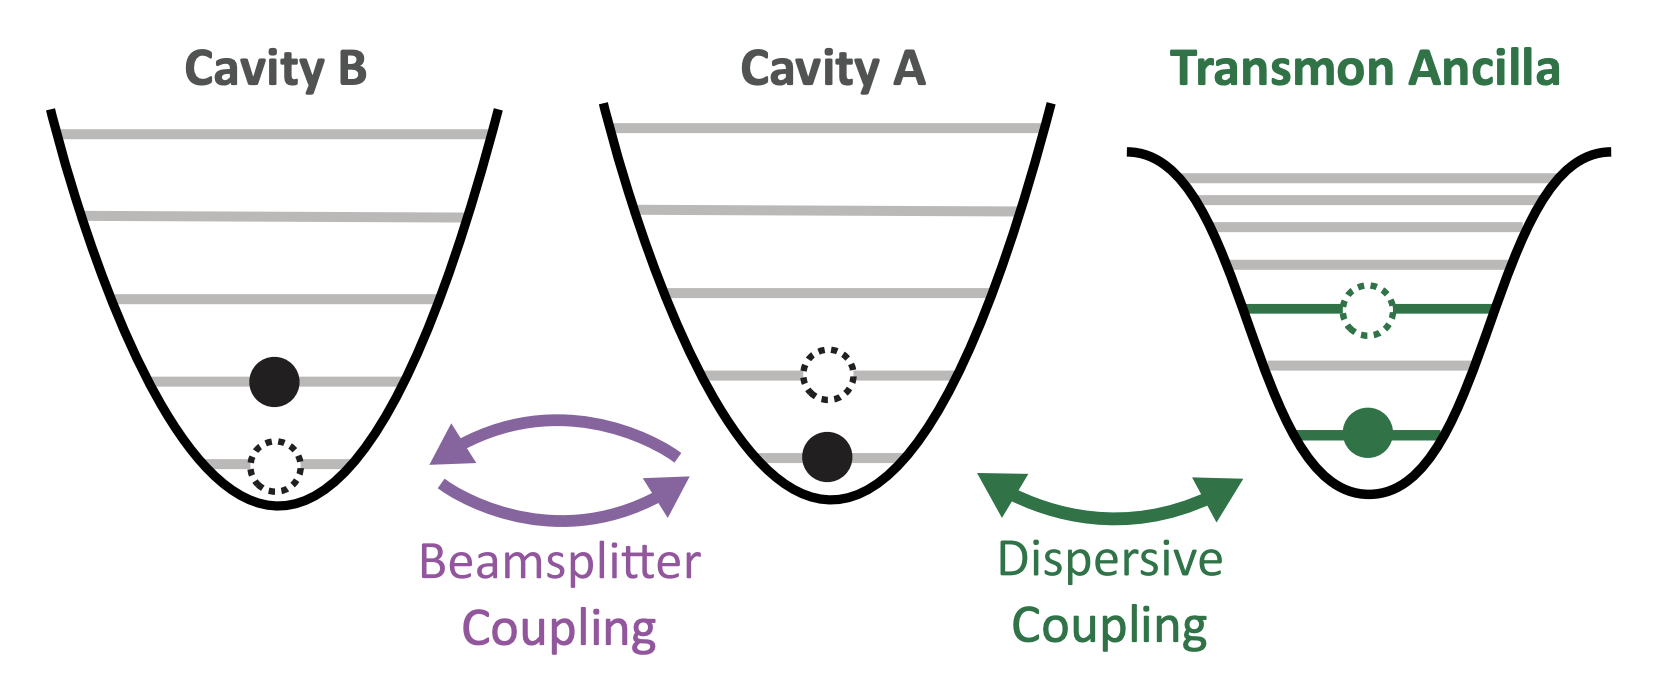

As described in the cheat sheet, the superconducting dual-rail qubit consists of two cavities - Cavity A and Cavity B as shown in the figure. Between two cavities, we can perform beamsplitter interactions  (i.e. linear operations). One of the cavities is coupled to a transmon ancilla for the purpose of dispersive non-linear operations and readouts. 

Although cavities have much longer lifetime than the transmon qubit, photon loss events can still happen. This photon loss events can usually be detected (at least to the first order) with methods that I will describe in later section. Now, suppose cavity A and cavity B have different photon loss rates $\kappa_A$ and $\kappa_B$. If we performed some measurements to infer that there was no photon-loss after evolving the system for a given time, then by Baysian inference, we would think the photon was more likely to live in the cavity that has lower loss rate. Thus, based on the measurement information, the state of the system will be updated. Over time, the weighting of a dual-rail qubit superposition changes to increase the probality of the photon being in the longer liver cavity, despite no photon loss being detected. This is the intuition behind the no-jump evolution for dual-rail qubits.

For those who would like to delve deeper into this topic, no-jump evolution can actually been explained mathematically from quantum master equation. The Lindblad master equation for open quantum system describes the evolution of the state:
\begin{equation}
    \dot{\rho}=-\frac{i}{\hbar}[H, \rho]+\sum_i \left(C_i \rho C_i^{\dagger}-\frac{1}{2}\left\{C_i^{\dagger} C_i, \rho\right\}\right),
\end{equation}
where $\rho$ is the density matrix of the system, $H$ is the Hamiltonian describing the unitary aspects of the dynamics, $C_i$ are a set of jump operators describing the dissipative part of the dynamics. For dual-rail qubits, the jump operators are $C_1 = \sqrt{\kappa_A}a$, $C_2 = \sqrt{\kappa_B}b$, where $a$ and $b$ are annihilation operators for cavity A and cavity B, descirbing the photon-loss events from each cavity.

The Lindblad master equation above can be recast into another form:
\begin{equation}
    \dot{\rho}=-\frac{i}{\hbar} \left(H_{eff}\rho - \rho H_{eff}^{\dag} \right)   + \sum_i C_i \rho C_i^{\dagger} ,
\end{equation}
where 
\begin{equation}
    H_{eff} = H - \frac{i}{2\hbar} \sum_i C_i^{\dagger} C_i,
\end{equation}
is an effective non-Hermitian Hamiltonian. In this form, we can interpret the time-evolution in the following way: The "free" time-evolution governed by the first term corresponds to the standard unitary time-evolution due to the system Hamiltonian combined with an effective decay evolution "out of" the "current" state. Then, the second term is the jump term, controlling the quantum jumps into different channels. 

To see this a little more clearly, we can assume that the initial state is a pure state, i.e.
\begin{equation}
    \rho(t_0) = |\psi_i\rangle \langle \psi_i |.
\end{equation}
It is relatively straightforward to see that the actions of both the free-evolution operator and the individual jump operators preserve the purity of the state. The free time-evolution (the no-jump part, which is always present) is just given by 
\begin{equation}
    |\psi(t_n)\rangle = e^{-iH_{eff}(t_n-t_{n-1})} |\psi(t_{n-1})\rangle,
\end{equation}
and the action of the jump operators is just 
\begin{equation}
    |\psi(t_n-1)\rangle \rightarrow C_i|\psi(t_n-1)\rangle.
\end{equation}
It is only after we incoherently sum over the different possible number of jumps and times at which the jumps occur that the state necessarily becomes a mixed state.

However, after we perform a measurement and find out that no jump happened. The measurement will map the system's state into a trace-preserved pure state (one can actually show this using stochastic master equation, but I will omitt the proof here). But the important thing is that the measurement infers that no jump happened so the action of the jump part (i.e. the second term) didn't play a role. But the system has evolved according to $H_{eff}$, thus changing the state. This is the physical origin of no-jump evolution.

For those who would like a more concrete mathematical description of the state evolution, we can actually calculate the effect of no-jump evolution based on a Kraus representation of the photon-loss channels. According to [[M. Micheal, et al. 2016]](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.6.031006), the Kauss operator associated with the no-jump backaction is 
\begin{equation}
    E_{00}  = e^{-\frac{1}{2} \left(  \kappa_A a^{\dag}a + \kappa_B b^{\dag}b  \right)t},
\end{equation}
and consequently photon-number preserving. We can calculate the time-evolution due to the no-jump backaction for an arbitrary initial state $|\psi_0\rangle$:
\begin{equation}
    \rho(0)=\left|\psi_0\right\rangle\left\langle\psi_0\right|=\left(\begin{array}{ll}
    |v|^2 & u^{\star} v \\
    u v^{\star} & |u|^2
    \end{array}\right)
\end{equation}
by calculating 
\begin{equation}
    \rho(t)=\frac{E_{00} \rho(0) E_{00}^{\dagger}}{\left|\left\langle\Psi_0\left|E_{00}^{\dagger} E_{00}\right| \Psi_0\right\rangle\right|} 
    =\left(\begin{array}{cc}
    \frac{|v|^2 e^{-\Delta \kappa t}}{1-|v|^2\left(1-e^{-\Delta \kappa t}\right)} & \frac{u^{\star} v e^{-\frac{1}{2} \Delta \kappa t}}{1-|v|^2\left(1-e^{-\Delta \kappa t}\right)}  \\
    \frac{u v^{\star} e^{-\frac{1}{2} \Delta \kappa t}}{1-|v|^2\left(1-e^{-\Delta \kappa t}\right)}  & \frac{|u|^2}{1-|v|^2\left(1-e^{-\Delta \kappa t}\right)}
    \end{array}\right),
\end{equation}
where $\Delta \kappa = \kappa_A - \kappa_B$ is the difference in photon loss rates of each cavity.
We can see immediately that the no-jump evolution vanishes if both cavities have identical photon loss rates ($\kappa_A = \kappa_B$), leaving the system in the initial state. In case there is a finite difference in loss rates ($\kappa_A \ne \kappa_B$), state evolves over time.


## 2. Variational Quantum Algorithms (VQAs)

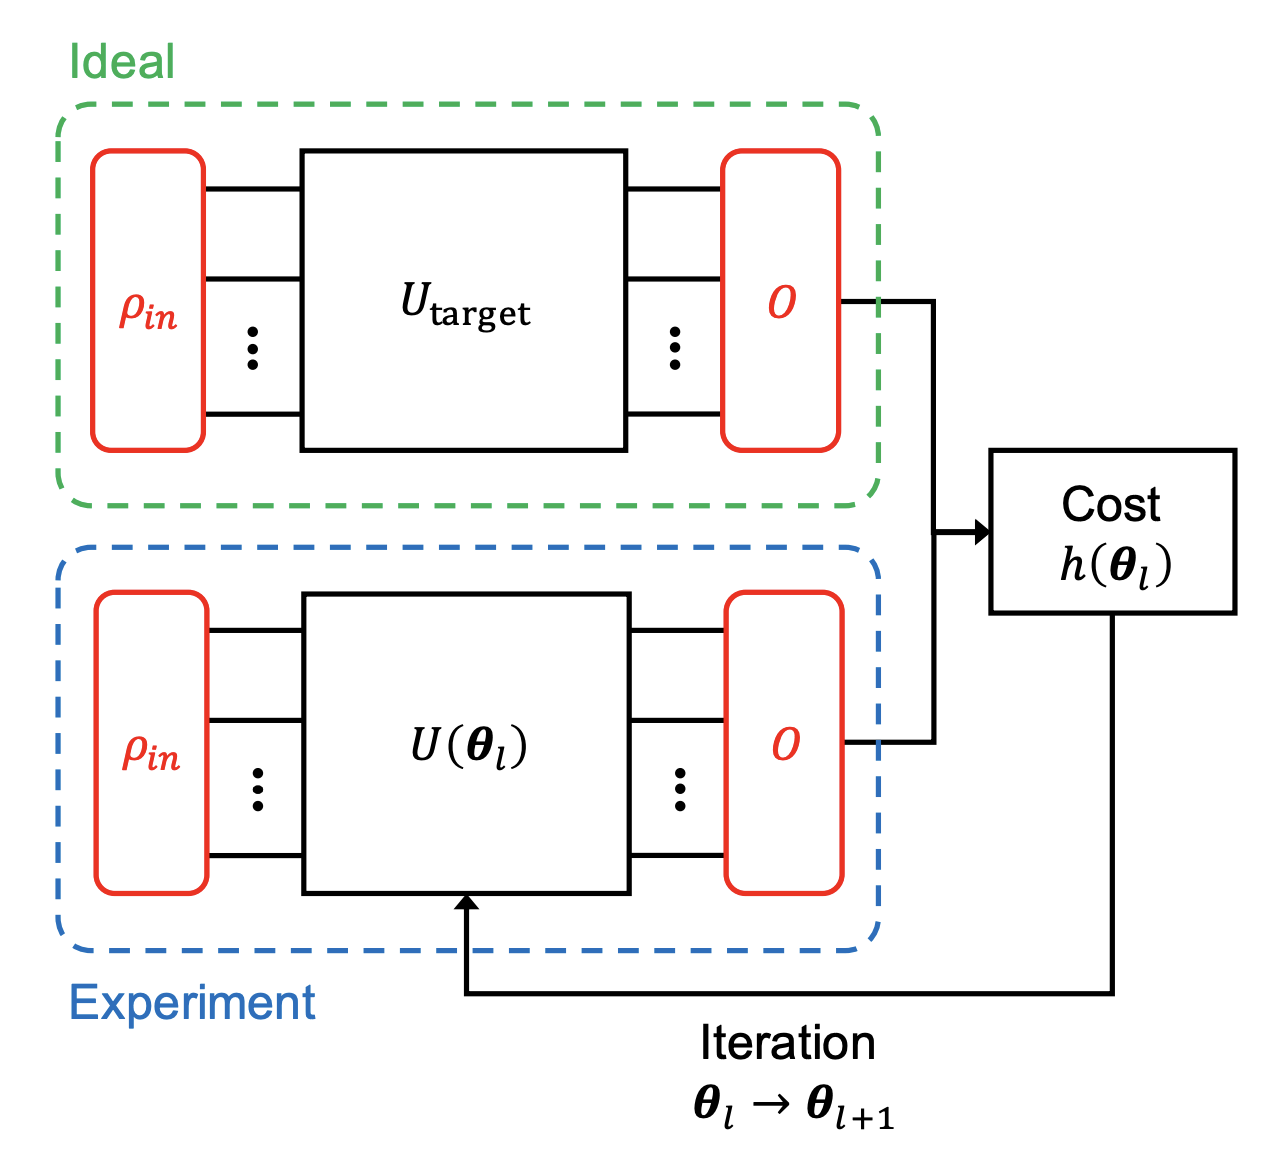

VAQs are hybrid quantum-classical algorithms, which usually involve the following steps:

**a) Define a Cost Function**
The idea behind VQAs is to use quantum computer to estimate a desired cost function $C\left(\vec{\theta}\right)$, which could be difficult to compute using classical computers. In this work, we want to optimize the quantum circuit in presence of no-jump evolution, so we can choose the cost function to be the infidelity of the quantum circuit (i.e. how far is the actual circuit implemented compared to the ideal circuit).

**b) Choose an Ansatz**
To start off the process, we will need to choose an ansatz: that is, an initial quantum circuit configurations, which can be described by a set of parameters $\vec{\theta}$ (as we will see in the following sections). 

**c) Optimization**
Once the cost function and ansatz have been defined, the next step is to train the parameters $\vec{\theta}$ and solve the optimization problem that minimize the cost function:
\begin{equation}
    \vec{\theta}^* = \arg \min_{\vec{\theta}}C(\vec{\theta}).
\end{equation}
We will need to pick a classical optimizer (either gradient-based optimizers or gradient-based optimizers depend on the task). At each iteration $l$, the quantum computer is used to estimate the cost function for a given parameter set $\vec{\theta}_l$. Then, the parameters are updated from $\vec{\theta}_l$ to $\vec{\theta}_{l+1}$ using the classical optimizer so as to minimize the cost $C(\vec{\theta})$. The process stops until a stopping criterion has been achieved.

The process can be summarized using the figure above.


## 3. Gate Operations for Superconducting Dual-rail Qubits

As described previously, the superconducting dual-rail qubit consists of two cavities. The logical code words are encoded in the single-photon subspace of the cavity system, with $|0\rangle_L = |01\rangle$ and $|1\rangle_L = |10\rangle$. (Here, $|01\rangle$ means $0$ photon in the cavity A and $1$ photon in the cavity B.) In fact, this encoding can be generalized to larger numbers of logical states (i.e. qudits instead of qubits). But I will keep my explaination to the qubit case here for simplicity.

In this section, I will briefly explain several gate operations on dual-rail qubits, which will be used in the VQA algorithms later. 

(Note that you don't have to fully understand the gate impletmentations presented in this section in order to understand the main results of VQAs later. I will in fact skip some details about the actual hardware-efficient gate impelementaions to avoid overcomplication, but rather give a high-level description.)

### 3.1 Beamsplitter interactions
Two cavities are coupled by a switchable beamsplitter interaction, which is sufficient to facilitate arbitrary single-qubit rotations. The beamsplitter interactions include 4 different operations:
\begin{equation}
    S_I = \frac{a^{\dagger}a + b^{\dagger}b}{2}, \quad
    S_x=\frac{a^{\dagger}b+a b^{\dagger}}{2}, \quad
    S_y=\frac{a^{\dagger}b-a b^{\dagger}}{2i}, \quad
    S_z=\frac{a^{\dagger}a-b^{\dagger}b}{2},
\end{equation}
where $a$ and $b$ are annihilation operators acting on cavity A and cavity B, respectively. Here, $\{S_I, S_x, S_y, S_z\}$ play direct analogue with the Pauli operators $\{I, \sigma_x, \sigma_y, \sigma_z\}$ in the usual qubit based computation. $S_I$ is essentially the identity operator, $S_x, S_y, S_z$ represent the single-qubit rotations around $x, y, z$-axes, respectively.

In practice, the beamsplitter interaction can be described by the following Hamiltonian:
\begin{equation}
    H_{BS} = \Omega_{BS} \left( cos\varphi_{BS} S_x + sin\varphi_{BS} S_y   \right),
\end{equation}
and the actual unitary gate implemented is of the form
\begin{equation}
    U_{BS} = e^{-iH_{BS}t}.
\end{equation}
One can actually show that arbitray single-qubit rotation can be achieved using this unitray gate [[J. Teoh, et al. 2023]](https://arxiv.org/pdf/2212.12077.pdf), with rotation axis specified by $\varphi_{BS}$ and rotation angle given by $\theta_{BS} = \Omega_{BS} t$, where $\Omega_{BS}$ is the beamsplitter driving rate.

In [2]:
# Define total number of photons in joint-cavities
N=1

# define annihilation operators for both cavities
a = tensor( destroy(N+1), qeye(N+1) , qeye(3) )
b = tensor( qeye(N+1) , destroy(N+1), qeye(3) )

S_I = 1/2 * ( a.dag()*a + b.dag()*b )
S_x = 1/2 * ( a.dag()*b + a*b.dag() )
S_y = 1/2j* ( a.dag()*b - a*b.dag() )
S_z = 1/2 * ( a.dag()*a - b.dag()*b )

# define somw parameters
alpha = 300  # transmon rotation rate (in MHz)
chi_f = 1.2  # kerr-nonlinearity between cavity A and transmon |f> state (in MHz)
chi_e = 0.9  # kerr-nonlinearity between cavity A and transmon |e> state (in MHz)

# For simplicity, define transmon states here
ket_g = tensor( qeye(N+1), qeye(N+1), basis(3,0) )
ket_e = tensor( qeye(N+1), qeye(N+1), basis(3,1) )
ket_f = tensor( qeye(N+1), qeye(N+1), basis(3,2) )

sigma_x_gf = ket_g * ket_f.dag()  +  ket_f * ket_g.dag()
sigma_y_gf = -1j*ket_g*ket_f.dag()+  1j*ket_f*ket_g.dag()
sigma_z_gf = ket_g * ket_g.dag()  -  ket_f * ket_f.dag()

# ket state for dual-rail cavities
def ket(n,m): 
    return tensor( basis(N+1,n) , basis(N+1,m) )

# define Beamplitter Hamiltonian
def H_BS(Omega_BS, phi_BS): 
    H = Omega_BS * ( np.cos(phi_BS) * S_x  +  np.sin(phi_BS) * S_y )
    return H

# define a Hmiltonian that is always active in the actual hardware
def H_0(alpha, chi_f, chi_e):   
    H_alpha = alpha/2 * ket_e * ket_e.dag() 
    H_chi   = - a.dag()*a * ( chi_f/2*ket_g*ket_g.dag()   +  (chi_f/2 -chi_e)*ket_e*ket_e.dag()  -  chi_f/2*ket_f * ket_f.dag())
    return H_alpha + H_chi

def BS(theta_BS, phi_BS, state_i,shots=1,c_ops=[],Omega_BS=50):
    '''
    Defining Beamsplitter Unitary Gate
    
    Inputs:
    theta_BS = BS rotation angle
    phi_BS   = the angle between the rotation axis and the x-axis
    state_i  = the input state
    
    Optional Inputs:
    shots  = number of shots in the simulation (i.e. number of repeated experiments)
    c_ops  = collapse operators
    Omega_BS = BS driving rate 
    
    Output:
    state_f = final state after implementing BS    
    '''
    while theta_BS <0:
        theta_BS += 2*np.pi
    t = theta_BS / Omega_BS
    H0 = H_0(alpha, chi_f, chi_e)
    Hbs = H_BS(Omega_BS, phi_BS)
    H =  H0 + Hbs
    if c_ops == []:
        state_f = mcsolve( H, state_i, [0,t], c_ops=c_ops,ntraj=shots,options=Options(nsteps=10000),progress_bar=None).states[1]
    elif shots == 1:
        state_f = mcsolve( H, state_i, [0,t], c_ops=c_ops,ntraj=shots,options=Options(nsteps=10000),progress_bar=None).states[0][1]
    else:
        state_f = mcsolve( H, state_i, [0,t], c_ops=c_ops,ntraj=shots,options=Options(nsteps=10000),progress_bar=None).states[:,1]
    return state_f

### 3.2 Transmon Rotation

Beamsplitter interactions essentially act as single qubit rotations for daul-rail cavities. In order to have full control over the whole system, we also need rotation operations for the transmon ancilla. The actaul impelementation of transmon drive is very similar to the beamsplitter interactions, but replacing $\{S_I, S_x, S_y, S_z\}$ with $\{I, \sigma_x, \sigma_y, \sigma_z\}$. 

The transmon drive can be described by the following Hamiltonian:
\begin{equation}
    H_{T} = \Omega_{T} \left( cos\varphi_{T} \sigma_x + sin\varphi_{T} \sigma_y   \right),
\end{equation}
and the actual unitary gate implemented is of the form
\begin{equation}
    U_{T} = e^{-iH_{T}t}.
\end{equation}


In [3]:
def H_T(Omega_T, phi_T):
    H = Omega_T * ( np.cos(phi_T) * sigma_x_gf  +  np.sin(phi_T) * sigma_y_gf )
    return H

def Transmon_rotation(theta_T, phi_T, state_i,Omega_T = 50,shots=1,c_ops=[]):
    '''
        Transmon Rotation

        Args:
            theta_T = transmon rotation angle
            phi_T   = specifies the transmon rotation angle. Thia is the angle between the rotation axis and the x-axis.
            state_i = input state

        Optional Args:
            Omega_T = transmon driving rate (for transmon rotation, we requires Omega_T>>chi)
            shots   = number of shots
            c_ops   = a list of collapse operators

        Output:
            state_f = final state
        '''
    t = theta_T / Omega_T /2
    H0 = H_0(alpha, chi_f, chi_e)
    Ht = H_T(Omega_T, phi_T)
    H = H0 + Ht
    if c_ops == []:
        state_f = mcsolve( H, state_i, [0,t], c_ops=c_ops,ntraj=shots,options=Options(nsteps=10000),progress_bar=None).states[1]
    elif shots == 1:
        state_f = mcsolve( H, state_i, [0,t], c_ops=c_ops,ntraj=shots,options=Options(nsteps=10000),progress_bar=None).states[0][1]
    else:
        state_f = mcsolve( H, state_i, [0,t], c_ops=c_ops,ntraj=shots,options=Options(nsteps=10000),progress_bar=None).states[:,1]
    return state_f

### 3.3 SNAP Gate
Beamsplitter interations alone cannot form a universal gate set. To achieve universal computation, we will need a source of non-Gaussian operations. This is where the transmon ancilla becomes useful, which is despersively coupled to one of the cavities. 

A particularly useful non-Gaussian gate is the so-called SNAP gate of the form
\begin{equation}
 S(\vec{\theta}_{SNAP}) = \prod_{n=0}^{\infty} e^{i\theta_n |n\rangle_L \langle n|_L},
\end{equation}
which can essentially add an arbitrary phase $\theta_n$ to any of the logical state $|n\rangle_L$. 

However, this theoretical desciption of gate can not be directly implemented on the hardware. Instead, I will simulate the SNAP gate based on the method described in [[P. Reinhold, et al. 2020]](https://www.nature.com/articles/s41567-020-0931-8).

In [4]:
def H_t_coef1(t,args): # time
    theta = args['theta']
    Omega = args['Omega']
    exp = 0
    for n in range(len(theta)):
        theta_n = theta[n]
        exp +=  np.exp( 1j* (n*chi_f* t - theta_n )) 
    return Omega*exp

def H_t_coef2(t,args):
    return np.conjugate( H_t_coef1(t,args))

def SNAP(psi_0,theta,Omega=0.01,c_ops=[],shots=1):
    '''
    Simulating SANP gates
    
    Inputs:
    psi_0 = Input state
    theta = a list of phases that want to add to each fock state
    
    Optional Inputs:
    Omega = transmon driving rate
    c_ops = collapse operators
    shots = number of shots in the simulation
    
    Output:
    Final states
    '''
    H0 =  ( chi_e * ket_e*ket_e.dag() + chi_f * ket_f*ket_f.dag() ) * a.dag()*a 
    t_end = np.pi / Omega /2
    
    H_list = [H0,[sigma_minus_gf ,H_t_coef1],[sigma_plus_gf,H_t_coef2]]
    if c_ops == []:
        psi_t = mcsolve(H_list,psi_0,[0,t_end],c_ops=c_ops,ntraj=shots,options=Options(nsteps=1000),args={'theta':theta,'Omega':Omega},progress_bar=None).states[1]
    elif shots == 1 :
        psi_t = mcsolve(H_list,psi_0,[0,t_end],c_ops=c_ops,ntraj=shots,options=Options(nsteps=1000),args={'theta':theta,'Omega':Omega},progress_bar=None).states[0][1]
    else:
        psi_t = mcsolve(H_list,psi_0,[0,t_end],c_ops=c_ops,ntraj=shots,options=Options(nsteps=1000),args={'theta':theta,'Omega':Omega},progress_bar=None).states[:,1]
    return psi_t

### 3.4 Joint Photon-Number Parity Measurements
Although cavities typically have longer lifetime than the transmons, photon loss events could still happen in cavities. The collapse operators for photon loss channels from two cavities are $c_a = \sqrt{\kappa_a}a$ and $c_b = \sqrt{\kappa_b}b$, where $\kappa_a$ and $\kappa_b$ are single photon decay rates for cavities A and B. Photon loss from cavities will result in errors in logical states. Luckily, this single photon loss events can be detected by measuring the joint photon-number parity of cavities. Without the photon loss happening, the logical codewords are 
$|0\rangle_L = |01\rangle$ and $|1\rangle_L = |10\rangle$, i.e. a single photon in the joint cavity Hilbert space with odd joint photon-number parity. If a single-photon loss event happened from either cavity, the cavity will be in the ground state $|00\rangle$, i.e. 0 photon state with even joint photon-number parity. Therefore, performing the joint photon-number parity measurements can detect the photon-loss event. We can thus do postselection to discard the photon-loss states.

The joint-parity measurements can be implemented as described in [[J Teoh, et al. 2023]](https://arxiv.org/pdf/2212.12077.pdf). This is a quantum non-demolition (QND) measurement, which does not affect the quantum states of the logical qubits. 

In [5]:
def Joint_Parity(state_i,c_ops=[]):
    '''
    Joint photon-number parity measurements
    
    Inputs:
    state_i = initial state
    
    Optional Inputs:
    c_ops = collapse operators
    
    Output:
    z = expectaion values of the z-measurement. (z=0 for even photon-number parity, z=1 for odd photon-number parity)
    '''
    #first do transmon y-rotation by pi/2
    theta_T = np.pi/2
    phi_T = np.pi/2
    state_1 = Transmon_rotation(theta_T, phi_T, state_i,Omega_T = 20,c_ops=c_ops)
    
    # Then do cS_I gate
    Omega_BS = np.sqrt(3)/2 * abs(chi_f) 
    delta = 0 
    theta_BS = np.sqrt(3)*np.pi   # theta_BS = Omega_BS * T
    phi_BS = 0
    state_2 = BS(theta_BS, phi_BS, state_1,c_ops=c_ops,Omega_BS=Omega_BS)
    
    # Then do transmon y-rotation by -pi/2
    theta_T = 3*np.pi/2
    phi_T = np.pi/2
    state_3 = Transmon_rotation(theta_T, phi_T, state_2,Omega_T = 20,c_ops=c_ops)
    
    # Finally do transmon z-meausrement
    z = expect(sigma_z_gf,state_3)
    return z

def reset_qubit(state_i,Omega_T=100,c_ops=[]):
    outcome,state_1 = measurement.measure_povm(state_i,[ket_g*ket_g.dag(),ket_e*ket_e.dag(),ket_f*ket_f.dag()])
    if int(outcome)==0:
        state_f = state_1
    elif int(outcome)==2:
        state_f = Transmon_rotation(np.pi,0,state_1,Omega_T=Omega_T,c_ops=c_ops)
    return state_f

def post_selection(psi0,N_desired,c_ops=[]):
    '''
    Perform the postselection to discard the states where photon loss happened (robust for single-photon loss event)
    '''
    if (int(N_desired) % 2) == 0:
        desired_parity = 1
    else:
        desired_parity = -1
    psi1 = reset_qubit(psi0, c_ops=c_ops)
    z_parity = round( Joint_Parity(psi1,c_ops=c_ops) )
    if z_parity == desired_parity:
        return "successful"
    else:
        return "discard"

For simplicity, we will assume that the cavity photon loss is the only source of error, which is sufficient to demonstrate the no-jump evolution. In practice, there are many other sources of errors, such as transmon decay, transmon dephasing and cavity dephasing, which can be detected or corrected with more complicated schemes, but unrelavant to this tutorial. 

## Example 1:  Optimize the state preparation with VQA
As a first example, I will demonstrate how to use VQA to optimize the process of state preparation. In practice, the state of the qubit is typically initialised in the ground state $|0\rangle_L=|01\rangle$. In order to prepare a desired state from the ground state, we will need to apply some single qubit rotations, which can be achieved using the beamsplitters described above in Section 3.1. 

Following the steps of VQA as described in Section 2:

**a) Define a Cost Function:** The state fidelity $F_{state} =  | \langle \psi_{ideal}|\psi_{experiment}\rangle |^2$ is a quantity that specifies how close the experimental state $|\psi_{experiment}\rangle$ prepared is to the ideal desired state $| \psi_{ideal}\rangle$. Therefore, we can define the cost function to be minimized as the infidelity of the state 
\begin{equation}
    C\left(\vec{\theta}\right) = 1 - \left| \left\langle \psi_{ideal}  \Big\rvert  \psi_{experiment}  \left(\vec{\theta}\right) \right\rangle \right|^2.
\end{equation}
This can be evaluated for experimental state postselecting on no photon loss. So the only source of infidelity is coming from the no-jump evolution. 
The $\left\rvert  \psi_{experiment}  \left(\vec{\theta}\right) \right\rangle$ can be prepared using quantum circuit that is only composed of beamsplitters, which can be fully specified by 2 parameters: rotation angle $\theta_{BS}$ and rotation axis $\varphi_{BS}$. So $\vec{\theta} = \left( \theta_{BS}, \varphi_{BS} \right)$ are parameters to be trained.

**b) Choosing an Ansatz:**
Choosing a good ansatz is generally a tricky thing in VQAs (just like the task of choosing a good intial parameters in classical machine learning) and there are many different methods proposed in order to do so. Here, we will use a 'problem-inspred ansatz'. The goal of this work is to determine the optimized quantum circuit to mitigate no-jump evolution. It is thus reasonable to choose the ansatz to be the ideal circuit that allow us to prepare the desired state in absence of the photon loss, which can usually be calculated analytically. 

For example, suppose we want to prepare a state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle_L + |1\rangle_L \right)$. Starting from the initialized ground state $|0\rangle_L=|01\rangle$, perform the single qubit rotation around y-axis by angle $\frac{\pi}{2}$, $|+\rangle$ state can be prepared in absence of no-jump evolution. Thus, we can pick $\vec{\theta}_0 = \left( \frac{\pi}{2}, \frac{\pi}{2} \right)$ as the ansatz, which corresponds to beamsplitter of y-rotation by $\frac{\pi}{2}$.

**c) Optimization:**
In presence of no-jump evolution, it is unlikely that the ansatz will give us a perfect state preparation. We then train the parameters $\vec{\theta}$ to minimize the cost $C\left(\vec{\theta}\right)$. I will use the quasi-Newton BFGS algorithm as the classical optimizer from Scipy.

Aside: In practice, the state fidelity $F_{state} =  | \langle \psi_{ideal}|\psi_{experiment}\rangle |^2$ is not a directly observable quantity in experiments [[R. Zhu, et al. 2023]](https://arxiv.org/pdf/2212.07513.pdf). One needs to use e.g. state tomography or state decomposition methods to obtain the fidelity. But in this tutorial, for simplicity, I will assume the state fidelity can be calculated directly since the exact state is known in numerical simulation.

### $|+\rangle$ state preparation
Let's now demonstrate how to optimize the circuit for $|+\rangle$ state preparation using method described above. In order to exaggarate the effects of no-jump evolution, I will purposely choose the cavity photon loss rate to be very large. 

In [7]:
# define cost function
def cost_function(state_ideal, state_actual):
    C = 1 - abs( state_ideal.ptrace([0,1]).overlap(state_actual.ptrace([0,1])) )**2
    return C

# define the circuit to be implemented
def circuit(state_initial, c_ops, parameters):
    theta_BS, phi_BS = parameters
    post_result = None
    while post_result != "successful":
        state_final = BS(theta_BS, phi_BS, state_initial,c_ops=c_ops)
        post_result = post_selection(state_final,N,c_ops=[0*a])  
    return state_final

# define the quantum simulation part of the VQA at each step
def VQA_step(parameters, state_initial, state_ideal, c_ops):
    state_final = circuit(state_initial, c_ops, parameters)
    infidelity = cost_function(state_ideal, state_final)
    return infidelity

In [16]:
# define ideal state that we want to prepare
state_ideal = tensor( (ket(0,1)+ket(1,0)).unit(), basis(3,0))

# define collapse operators
kappa_a = 0.8   # photon loss rate for cavity A (purposely chosen to be very large)
kappa_b = kappa_a * 100  # To exaggarate the effects of no jump evolution, I define the photon loss rate for cavity B to be 100 times of the cavity A (in practice, this will not be so large)
c_ops = [ np.sqrt(kappa_a)*a,  np.sqrt(kappa_b)*b ]

#define initial states
cavity = ket(1,0)
qubit = basis(3,0)
state_initial = tensor( cavity , qubit ).unit()

# define ansatz 
theta_BS_0 = np.pi/2
phi_BS_0 = np.pi/2
ansatz = [theta_BS_0,phi_BS_0]
# Let's calculate without VQA optimization, what's the infidelity of the ansatz
state_final_ansatz = circuit(state_initial,c_ops,ansatz)
infidelity_ansatz  = cost_function(state_ideal,state_final_ansatz)

# Now let's use an optimizer to run VQA
VQA_results = minimize(VQA_step, x0=ansatz, args=(state_initial, state_ideal, c_ops), method = "BFGS")

In [17]:
print('Prior to VQA optimization:')
print('Infidelity = %.3f' %infidelity_ansatz)
print('')
print('After VQA optimization:')
print('Infidelity = %.3f' %VQA_results.fun)
print('')
print(VQA_results)

Prior to VQA optimization:
Infidelity = 0.183

After VQA optimization:
Infidelity = 0.000

      fun: 1.1102230246251565e-14
 hess_inv: array([[23.19903558,  0.27661142],
       [ 0.27661142,  1.00198948]])
      jac: array([-2.98023224e-08, -1.49011612e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([4.07195154, 1.59909419])


This actually works very well! After using VQA, we find the parameters for $|+\rangle$ state preparation with almost perfect state fidelity.

### Arbitrary State Preparation
I have shown that VQA works well for optimizing the $|+\rangle$ state preparation. Let's now investigate whether we can use VQA to optimize the circuits for arbitrary state preparation.

The most general form of arbitrary single qubit state is $|\psi\rangle = \alpha |0\rangle_L + \beta |1\rangle_L$, where $\alpha$ and $\beta$ are complex amplitudes. Disregarding the global phase, and ensuring the normalisation constraint, we have actually two real degrees of freedom. Thus the state can be expressed as $ |\psi\rangle = cos(\theta)|0\rangle_L + sin(\theta) e^{i\phi}|1\rangle_L$, with real parameters $\theta \in [0,\pi],\phi \in  [0,2\pi)$. Here, I will randomly generate target states by specifying $\theta$ and $\phi$, and use VQA to find optimized circuit to prepare such states.

In [18]:
# This block may take ~4min to run

n = 50 #number of target states want to generate

# Randomly generate parameters for target states
np.random.seed(1)
theta_list = np.random.uniform(0,np.pi,n)
phi_list = np.random.uniform(0,2*np.pi,n) 

# define collapse operators
kappa_a = 0.6   # photon loss rate for cavity A (purposely chosen to be very large)
kappa_b = kappa_a * 100  # To exaggarate the effects of no jump evolution, I define the photon loss rate for cavity B to be 100 times of the cavity A (in practice, this will not be so large)
c_ops = [ np.sqrt(kappa_a)*a,  np.sqrt(kappa_b)*b ]

#define initial states
cavity = ket(1,0)
qubit = basis(3,0)
state_initial = tensor( cavity , qubit ).unit()

results_list = []
infidelity_ansatz_list = []
for i in range(n):
    #print(i)
    theta = theta_list[i]
    phi = phi_list[i]

    # define ansatz 
    theta_BS_0 = theta
    phi_BS_0 = np.pi/2 - phi 
    ansatz = [theta_BS_0,phi_BS_0]

    state_ideal = tensor( ( np.sin(theta/2)*ket(0,1) + np.cos(theta/2)*np.exp(1j*phi)*ket(1,0) ).unit(), basis(3,0)) #target state

    #Let's calculate without VQA optimization, what's the infidelity of the ansatz
    state_final_ansatz = circuit(state_initial,c_ops,ansatz)
    infidelity_ansatz  = cost_function(state_ideal,state_final_ansatz)
    
    infidelity_ansatz_list.append(infidelity_ansatz)

    VQA_results = minimize(VQA_step, x0=ansatz, args=(state_initial, state_ideal, c_ops), method = "BFGS")
    results_list.append( VQA_results )

Prior to VQA optimization:
States prepared according to 50 randomly generated target states:
average infidelity =  0.19040054202638873
standard deviation =  0.21596843738368485

After VQA optimization:
States prepared according to 50 randomly generated target states:
average infidelity =  3.879891598968177e-05
standard deviation =  0.00027159210771861124

All target states generated shown on a Bloch sphere:


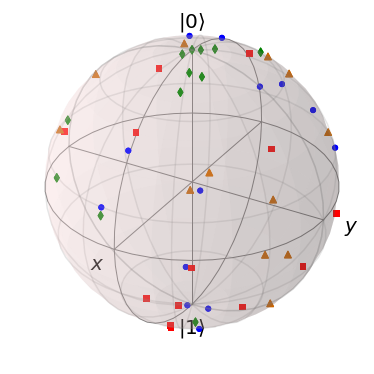

In [15]:
print('Prior to VQA optimization:')
mean_prior = np.mean(infidelity_ansatz_list)
std_prior = np.sqrt( np.var(infidelity_ansatz_list) )
print('States prepared according to %.f randomly generated target states:' %(len(infidelity_ansatz_list)))
print('average infidelity = ',mean_prior)
print('standard deviation = ',std_prior)
print('')

print('After VQA optimization:')
infidelity_list = [result.fun for result in results_list]
mean = np.mean(infidelity_list)
std = np.sqrt( np.var(infidelity_list) )
print('States prepared according to %.f randomly generated target states:' %(len(results_list)))
print('average infidelity = ',mean)
print('standard deviation = ',std)
print('')

print('All target states randomly generated shown on a Bloch sphere:')
bl= qutip.Bloch()
for i in range(n):
    theta = theta_list[i]
    phi = phi_list[i]
    state_ideal = tensor( ( np.sin(theta/2)*ket(0,1) + np.cos(theta/2)*np.exp(1j*phi)*ket(1,0) ).unit(), basis(3,0)) 
    x = expect(S_x,state_ideal)*2
    y = expect(S_y,state_ideal)*2
    z = expect(S_z,state_ideal)*2

    bl.add_points([x,y,z])
bl.render()




As we can see, the  VQA dramstically reduce the infidelity of the state to almost 0. Therefore, it is reasonable to conclude that VQA can efficietly mitigate the no-jump evolution for arbitrary state preparations.

## Example 2:  Optimize gate fidelity of quantum circuits with VQA

In the previous example, we have shown that VQA can efficietly mitigate the no-jump evolution for arbitrary state preparation. In this section, I want to investigate whether we can use VQA to optimize the gate fidelity of arbitrary quantum circuits in presence of no-jump evolution. 

Previously, I have restricted the discussion to dual-rail qubits (i.e. only a single photon in the joint-cavities). However, we can actually include more photons in the cavities. Suppose we have $d$ photons in the joint-cavities, we essentially have a dual-rail qudit with $(d+1)$-dimesional Hilbert space, which can give us more computational power than qubits in general. In this example, I will be working with dual-rail qutrits (i.e. 2 photons in joint-cavities, making a 3-dimensional Hilbert space). The logical states of the dual-rail qutrits are: $|0\rangle_L=|02\rangle, |1\rangle_L=|11\rangle, |2\rangle_L=|20\rangle$.

In [14]:
# Adapting the codes with dual-rail qutrits

# Define total number of photons in joint-cavities
N=2

a = tensor( destroy(N+1), qeye(N+1) , qeye(3) )
b = tensor( qeye(N+1) , destroy(N+1), qeye(3) )

S_I = 1/2 * ( a.dag()*a + b.dag()*b )
S_x = 1/2 * ( a.dag()*b + a*b.dag() )
S_y = 1/2j* ( a.dag()*b - a*b.dag() )
S_z = 1/2 * ( a.dag()*a - b.dag()*b )

ket_g = tensor( qeye(N+1), qeye(N+1), basis(3,0) )
ket_e = tensor( qeye(N+1), qeye(N+1), basis(3,1) )
ket_f = tensor( qeye(N+1), qeye(N+1), basis(3,2) )

sigma_x_gf = ket_g * ket_f.dag()  +  ket_f * ket_g.dag()
sigma_y_gf = -1j*ket_g*ket_f.dag()+  1j*ket_f*ket_g.dag()
sigma_z_gf = ket_g * ket_g.dag()  -  ket_f * ket_f.dag()
sigma_minus_gf = ket_g * ket_f.dag()
sigma_plus_gf = ket_f * ket_g.dag()

Gate fidelity (also called process fidelity) is commonly used to evaluate the quality of the quantum channels. Suppose we attempt to realize a desired ideal channel $\Lambda$ that maps input states $\rho_I$ to designated output states $\rho_f = \Lambda(\rho_I)$. But in the actual experimental realization, the actual channel $\Gamma$ implemented may not perfectly coincide with $\Lambda$. The similarity between the experimental channel $\Gamma$ and the ideal channel $\Lambda$ is typically quantified by the gate fidelity:
\begin{equation}
    F_{gate}(\Lambda,\Gamma) = \frac{1}{d^2} \sum_{i=1}^{d^2} Tr[ \Lambda(\rho_i) \Gamma(\rho_i) ],
\end{equation}
where $d$ is the dimension of Hilber space. For dual-rail qutrits ($d=3$), we need to sample from at least $d^3=9$ states that form a complete set of mutually orthonormal states on a 3-dimensional Hilbert space. The choices of these states are not unique, but I will follow the method discribed in Eq.(18) of [[E. Bagan, et al. 2003]](https://arxiv.org/pdf/quant-ph/0207152.pdf) to calculate the gate fidelity for qutrit systems. 

The circuit I will simulate is the following, including a beamsplitter, a transmon rotation and a SNAP gate:

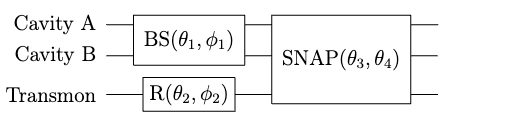


For demonstration purpose, I will choose the desired the parameters of the circuit to be $[\theta_1, \phi_1, \theta_2, \phi_2, \theta_3, \theta_4] = [\frac{\pi}{3},\frac{\pi}{4}, \frac{2\pi}{5}, \frac{\pi}{3}, \frac{3\pi}{2}, \frac{\pi}{6}]$, but these parameters can indeed be chosen arbitrarily.

Now the VQA process is as the following:

**a) Define a Cost Function:** We can define the cost function to be the infidelity of the quantum circuit:
\begin{equation}
    C\left(\vec{\theta},\vec{\phi}\right) = 1 - F_{gate}(\Lambda,\Gamma).
\end{equation}
$\vec{\theta},\vec{\phi}$ are parameters to be optimized.

**b) Choosing an Ansatz:**
It is reasonable to choose parameters as required in the ideal circuits as the ansatz.

**c) Optimization:**
Here, I will use the Constrained Optimization BY Linear Approximation (COBYLA) algorithm from Scipy.

In [285]:
# In practice, we use parity check measurement to ensure the error detection of photon loss to first order. But in the event of two photon loss, parity check measurements cannot detect the errors. 
# In this tutorial, I want to just focus on the no-jump evolution, but disregard the infidelity due to higher-order photon loss events. Therefore, I will assuem that we can perfectly detect the total number of photons in the joint-cavities, hence postselect on any photon-loss events.
def post_select(state,N_desired):   
    N_actual = expect(S_I,state)*2
    if np.round(N_actual) == np.round(N_desired):
        return 'successful'
    else:
        return 'discard'
    
def circuit(theta_list,state_i,c_ops=[]):
    theta_1, phi_1, theta_2, phi_2, theta_3, theta_4 = theta_list

    post_result = None
    while post_result != "successful":
        state_1 = BS(theta_1, phi_1, state_i,c_ops=c_ops,Omega_BS=50)
        state_2 = Transmon_rotation(theta_2, phi_2, state_1,Omega_T = 50,c_ops=c_ops)
        post_result = post_select(state_2,N)

    post_result = None
    while post_result != "successful":
        theta_SNAP = np.array([0,theta_3,theta_4])
        state_final = SNAP(state_2,theta_SNAP,Omega=0.1,c_ops=c_ops)
        post_result = post_select(state_final,N)
    return state_final

# define cost function
def cost_function(parameters, theta_list_ideal, c_ops):
    alpha = [np.exp(2j*(r-1)*np.pi/3)   for r in [1,2,3] ]

    qubit = basis(3,0)
    L0 = tensor( ket(0,2), qubit)
    L1 = tensor( ket(1,1), qubit)
    L2 = tensor( ket(2,0), qubit)

    state_list = []
    for r in range(3):
        state = ( 1*L0 + alpha[r]*L1 ).unit()
        state_list.append(state)
        state = ( 1*L1 + alpha[r]*L2 ).unit()
        state_list.append(state)
        state = ( 1*L2 + alpha[r]*L0 ).unit()
        state_list.append(state)

    #calculate gate fidelity
    F = 0
    for state_initial in state_list:
        state_ideal = circuit(theta_list_ideal,state_initial,c_ops=[0*a])

        F_state = []
        for _ in range(1):
            state_actual = circuit(parameters,state_initial,c_ops=c_ops)
            f = abs( state_actual.ptrace([0,1,2]).overlap(state_ideal.ptrace([0,1,2])) )**2
            F_state.append(f)
        F += np.mean(F_state)
    F/=9
    C = 1- F
    return C

In [286]:
theta_list = [np.pi/3, np.pi/4, 2*np.pi/5, np.pi/3, 3*np.pi/2, np.pi/6]

# define collapse operators
kappa_a = 1/1001   # photon loss rate for cavity A 
kappa_b = kappa_a * 50
c_ops = [ np.sqrt(kappa_a)*a,  np.sqrt(kappa_b)*b ]

ansatz = theta_list
VQA_results = minimize(cost_function, x0=ansatz, args=(theta_list, c_ops), method = "COBYLA")

In [273]:
infidelity_ansatz = cost_function(theta_list,theta_list,c_ops)
print('Prior to VQA optimization:')
print('Infidelity = %.3f' %infidelity_ansatz)
print('')
print('After VQA optimization:')
print('Infidelity = %.3f' %VQA_results.fun)
print('')
print(VQA_results)
print(theta_list)

Prior to VQA optimization:
Infidelity = 0.135

After VQA optimization:
Infidelity = 0.135

     fun: 0.13519145457947235
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 77
  status: 1
 success: True
       x: array([1.0461762 , 0.79858628, 1.26069742, 1.05957294, 4.71758636,
       0.53257624])
[1.0471975511965976, 0.7853981633974483, 1.2566370614359172, 1.0471975511965976, 4.71238898038469, 0.5235987755982988]


As we can see, the gate infidelity of the circuit did not improve after using VQA. I hypothesize the reason to be the no-jump evolution affect differnt states in different ways, even if those states are expriencing the same circuit. For different given input states, we will need to change the parameters of the circuits in different ways in order to mitigate the no-jump evolution and produce the desired output states. Therefore, it is in genral not feasible to find a fixed set of circuit parameters that mitigate the no-jump evolution for any given input states. 

To verify this hypothesis, let's take two different initial states and let them go through the same quantum circuit as shown above, then use VQA to minimize the infidelity of the output states. 

In [283]:
# define cost function as the infidelity of output state
def cost_function(parameters, theta_list_ideal, state_initial, c_ops,post=True):
    state_ideal = circuit(theta_list_ideal,state_initial,c_ops=[0*a])
    state_actual = circuit(parameters,state_initial,c_ops=c_ops)
    F = abs( state_actual.overlap(state_ideal) )**2
    C = 1-F
    return C

state_1_initial = tensor(ket(2,0),basis(3,0))  # first initial state: |2,0> \otimes |g>
state_2_initial = tensor(ket(1,1),basis(3,0))  # second initial state: |1,1> \otimes |g>

theta_list = [2*np.pi/3, np.pi/4, 2*np.pi/5, np.pi/3, np.pi/2, np.pi/6]

# define collapse operators
kappa_a = 1/1001   # photon loss rate for cavity A 
kappa_b = kappa_a * 100
c_ops = [ np.sqrt(kappa_a)*a,  np.sqrt(kappa_b)*b ]

ansatz = theta_list
VQA_results_1 = minimize(cost_function, x0=ansatz, args=(theta_list, state_1_initial,c_ops), method = "COBYLA")
VQA_results_2 = minimize(cost_function, x0=ansatz, args=(theta_list, state_2_initial,c_ops), method = "COBYLA")


In [284]:
infidelity_ansatz_1 = cost_function(theta_list,theta_list,state_1_initial,c_ops)
infidelity_ansatz_2 = cost_function(theta_list,theta_list,state_2_initial,c_ops)
print('State 1:')
print('Prior to VQA optimization:')
print('Infidelity = %.3f' %infidelity_ansatz_1)
print('')
print('After VQA optimization:')
print('Infidelity = %.3f' %VQA_results_1.fun)
print('')
print(VQA_results_1)
print(theta_list)

print('')
print('State 2:')
print('Prior to VQA optimization:')
print('Infidelity = %.3f' %infidelity_ansatz_2)
print('')
print('After VQA optimization:')
print('Infidelity = %.3f' %VQA_results_2.fun)
print('')
print(VQA_results_2)
print(theta_list)

State 1:
Prior to VQA optimization:
Infidelity = 0.251

After VQA optimization:
Infidelity = 0.000

     fun: 5.7830389810220595e-08
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 222
  status: 1
 success: True
       x: array([2.62510138, 0.80993601, 1.25678942, 1.04687154, 1.57065419,
       0.52271932])
[2.0943951023931953, 0.7853981633974483, 1.2566370614359172, 1.0471975511965976, 1.5707963267948966, 0.5235987755982988]

State 2:
Prior to VQA optimization:
Infidelity = 0.272

After VQA optimization:
Infidelity = 0.224

     fun: 0.22408756280359
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 292
  status: 1
 success: True
       x: array([2.39692746, 0.79543074, 1.25623958, 1.04884827, 1.57160245,
       0.52444805])
[2.0943951023931953, 0.7853981633974483, 1.2566370614359172, 1.0471975511965976, 1.5707963267948966, 0.5235987755982988]


As we can see here, for the first initial state chosen, the infidelity can be reduced to zero using VQA, showing that the no-jump evolution can be effectively mitigated. However, for the second state, although the infidelity reduced after applying VQA process, the infidelity does not drop down to zero, which means the VQA cannot completely mitigate the effects of no-jump evolution for this particular state and circuit configuration. So our previous hypothesis was paritally correct: the no-jump evolution affects different states in different ways even if they all undergo the same quantum circuits; no-jump evolution can be mitigated using VQA for some paritcular states and circuit configurations, but not for all states and circuits. 

A deeper question is to ask for what states and circuit configurations the no-jump evolution can be effectively mitigated by VQA. To answer this question, one needs to consider many different states and circuit configurations, which involves lots of further works and is beyond the scope of this tutorial.

## Conclusion

In this work, I have shown that VQA can be used to mitigate the no-jump evolution for arbitrary state preparations effectively. But in general,no-jump evolution cannot always be mitigated for arbitrary quantum circuit implementations.